In [36]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np 

In [37]:
def plot_stacked_bar(data, series_labels, category_labels=None, 
                     show_values=False, value_format="{}", y_label=None, 
                     colors=None, grid=False, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    colors          -- List of color labels
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], color=color))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)

    plt.legend()

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

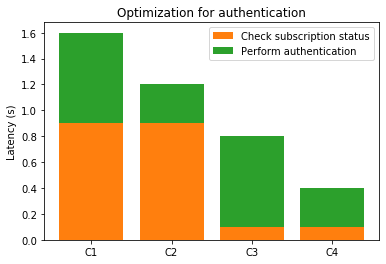

In [38]:
# Auth : optimization

series_labels = ['Check subscription status', 'Perform authentication']

#       subscription data prefetching       reuse of token
# C1 -          n                                   n
# C2 -          n                                   y
# C3 -          y                                   n
# C4 -          y                                   y
category_labels = ['C1', 'C2', 'C3', 'C4']

data = [
    [0.9, 0.9, 0.1, 0.1],
    [0.7, 0.3, 0.7, 0.3]
]

plot_stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=False, 
    value_format="{:.1f}",
    colors=['tab:orange', 'tab:green', 'tab:blue'],
    y_label="Latency (s)"
)

plt.title('Optimization for authentication')
plt.savefig('auth_opt.png')
plt.show()

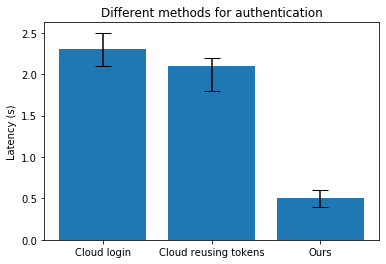

In [49]:
# Auth: Different methods 

auth_method = ['Cloud login', 'Cloud reusing tokens', 'Ours']
latency = [2.3, 2.1, 0.5]
min_latency = [2.1, 1.8, 0.4]
max_latency = [2.5, 2.2, 0.6]
yerr = [np.subtract(latency, min_latency), np.subtract(max_latency, latency)]

plt.bar(auth_method, latency, yerr=yerr, capsize=8)
plt.ylabel('Latency (s)')
plt.title('Different methods for authentication')
plt.savefig('auth_methods.png')
plt.show()

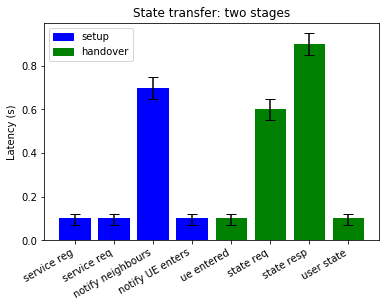

In [55]:
import matplotlib.patches as mpatches

# State transfer: two stages

state_transfer_stages = ['service reg', 'service req', 'notify neighbours', 'notify UE enters' \
    , 'ue entered', 'state req', 'state resp', 'user state']
latency = [0.1, 0.1, 0.7, 0.1, 0.1, 0.6, 0.9, 0.1]
min_latency = [0.07, 0.07, 0.65, 0.07, 0.07, 0.55, 0.85, 0.07]
max_latency = [0.12, 0.12, 0.75, 0.12, 0.12, 0.65, 0.95, 0.12]
yerr = [np.subtract(latency, min_latency), np.subtract(max_latency, latency)]

fig, ax = plt.subplots()

plt.bar(state_transfer_stages, latency, color=['blue', 'blue', 'blue', 'blue' \
    , 'green', 'green', 'green', 'green'], yerr=yerr,  capsize=5)

plt.ylabel('Latency (s)')

blue_patch = mpatches.Patch(color='blue', label='setup')
green_patch = mpatches.Patch(color='green', label='handover')
plt.legend(handles=[blue_patch, green_patch])

labelsx = ax.get_xticklabels()
plt.setp(labelsx, rotation=30, fontsize=10, ha='right')


plt.title('State transfer: two stages')
plt.savefig('state_transfer_stages.png')
plt.show()

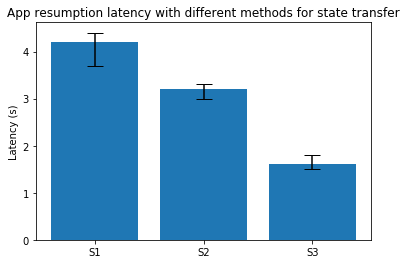

In [51]:
# App resumption latency : different methods for state transfer

# S1 - State transfer via cloud
# S2 - Without prefetching states
# S3 - With prefetching states
transfer_method = ['S1', 'S2', 'S3']
latency = [4.2, 3.2, 1.6]
min_latency = [3.7, 3.0, 1.5]
max_latency = [4.4, 3.3, 1.8]
yerr = [np.subtract(latency, min_latency), np.subtract(max_latency, latency)]

plt.bar(transfer_method, latency, yerr=yerr, capsize=8)
plt.ylabel('Latency (s)')
plt.savefig('state_transfer_methods.png')
plt.title('App resumption latency with different methods for state transfer')
plt.show()

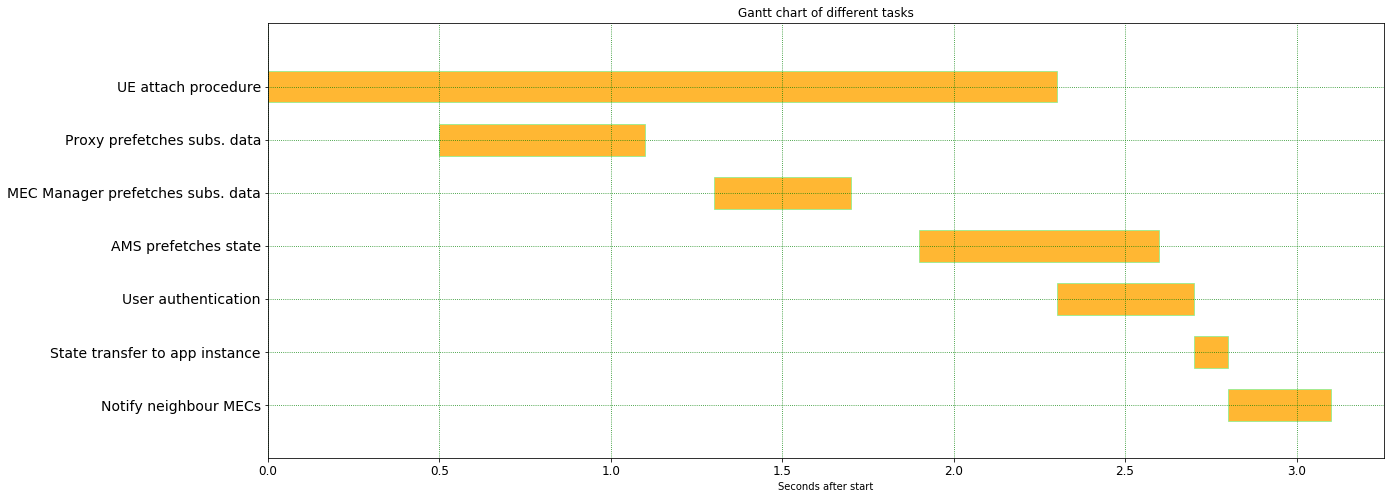

In [42]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np

def CreateGanttChartPoint(data):
    """
    Create gantt charts with matplotlib from data
    """ 
    
    # An array of tuples. A tuple has a label and a period.
    task_periods = []

    for ylabel, start_point, end_point in data:
        task_periods.append((ylabel, (start_point, end_point)))

    ilen=len(task_periods)
    pos = np.arange(0.5, ilen*0.5+0.5,0.5)
    
    # Create plot
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    
    for i in range(len(task_periods)):
         start_point, end_point = task_periods[i][1]
         ax.barh((i*0.5)+0.5, end_point - start_point, left=start_point, 
                height=0.3, align='center', edgecolor='lightgreen', 
                color='orange', alpha = 0.8)
    
    locsy, labelsy = plt.yticks(pos, [task[0] for task in task_periods])
    
    plt.setp(labelsy, fontsize = 14)
    ax.set_ylim(ymin = -0.1, ymax = ilen*0.5+0.5)
    ax.grid(color = 'g', linestyle = ':')
    ax.set_xlabel('Seconds after start')
    ax.set_title('Gantt chart of different tasks')
  
    labelsx = ax.get_xticklabels()
    plt.setp(labelsx, fontsize=12)
 
    ax.invert_yaxis()
    plt.savefig('gantt.png')
    plt.show()

data = [
    [ 'UE attach procedure', 0, 2.3],
    [ 'Proxy prefetches subs. data', 0.5, 1.1 ],
    [ 'MEC Manager prefetches subs. data', 1.3, 1.7],
    [ 'AMS prefetches state', 1.9, 2.6],
    [ 'User authentication', 2.3, 2.7],
    [ 'State transfer to app instance', 2.7, 2.8],
    [ 'Notify neighbour MECs', 2.8, 3.1]
]

CreateGanttChartPoint(data)